# 폴리움 군집 시각화 

## 폴리움 시각화 데이터 준비

In [14]:
from data_preparation import get_cluster_df, get_data
from folium_data_prep import filter_by_service, drop_columns, join_with_previous_df
from perform_clustering import perform_clustering
from folium_visualize import adjust_cluster, create_map

In [2]:
clustering_df = get_cluster_df() 
previous_df_for_join = get_data() 

In [3]:
villa_clustering_df = filter_by_service(clustering_df, 'service_type_빌라', 1)
oneroom_clustering_df = filter_by_service(clustering_df, 'service_type_원룸', 1)
officetel_clustering_df = filter_by_service(clustering_df, 'service_type_오피스텔', 1)

villa_clustering_df = drop_columns(villa_clustering_df, ['service_type_빌라','service_type_오피스텔','service_type_원룸'])
oneroom_clustering_df = drop_columns(oneroom_clustering_df, ['service_type_빌라','service_type_오피스텔','service_type_원룸'])
officetel_clustering_df = drop_columns(officetel_clustering_df, ['service_type_빌라','service_type_오피스텔','service_type_원룸'])

In [4]:
villa_cluster = perform_clustering(villa_clustering_df)
oneroom_cluster = perform_clustering(oneroom_clustering_df)
officetel_cluster = perform_clustering(officetel_clustering_df)

In [5]:
villa_cluster = join_with_previous_df(villa_cluster, previous_df_for_join, '빌라') 
oneroom_cluster = join_with_previous_df(oneroom_cluster, previous_df_for_join, '원룸') 
officetel_cluster = join_with_previous_df(officetel_cluster, previous_df_for_join, '오피스텔')

## 폴리움 시각화 

In [6]:
oneroom_cluster['cluster'] = oneroom_cluster.apply(adjust_cluster, axis=1)
officetel_cluster['cluster'] = officetel_cluster.apply(adjust_cluster, axis=1)

In [7]:
import pandas as pd 
villa_oneroom_officetel_combined = pd.concat([villa_cluster, oneroom_cluster, officetel_cluster])

In [ ]:
combined_map = create_map(villa_oneroom_officetel_combined, 18)
combined_map

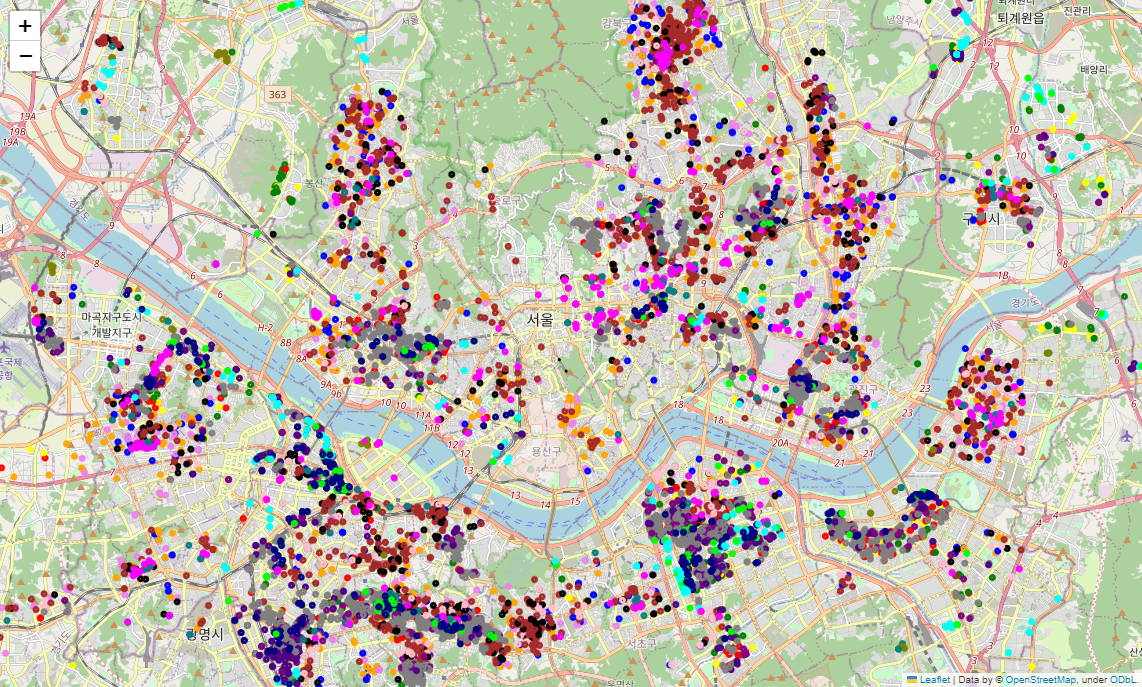

In [ ]:
villa_map = create_map(villa_cluster, 6) 
villa_map 

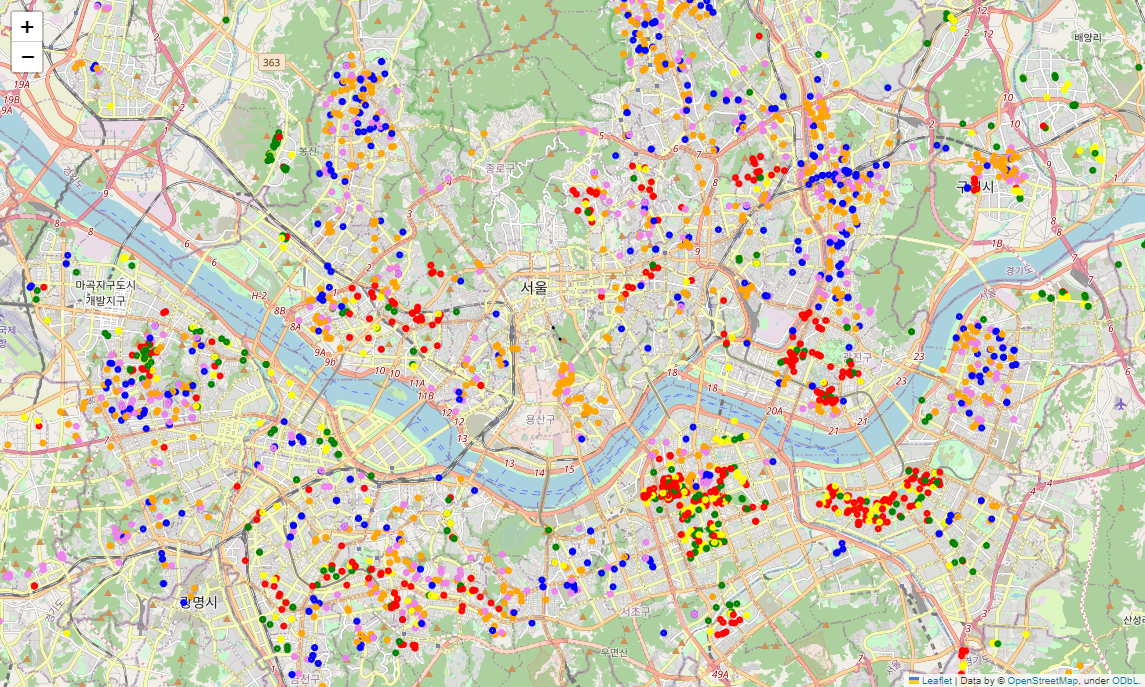

In [ ]:
oneroom_map = create_map(oneroom_cluster, 6)
oneroom_map

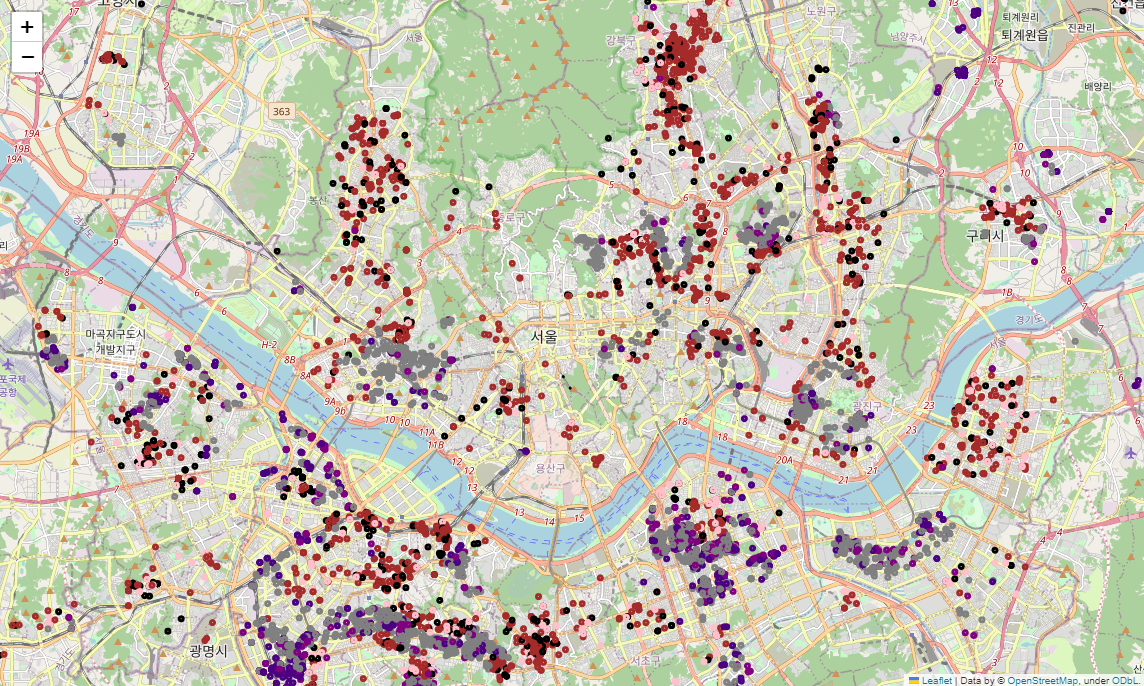

In [ ]:
officetel_map = create_map(officetel_cluster, 6) 
officetel_map 

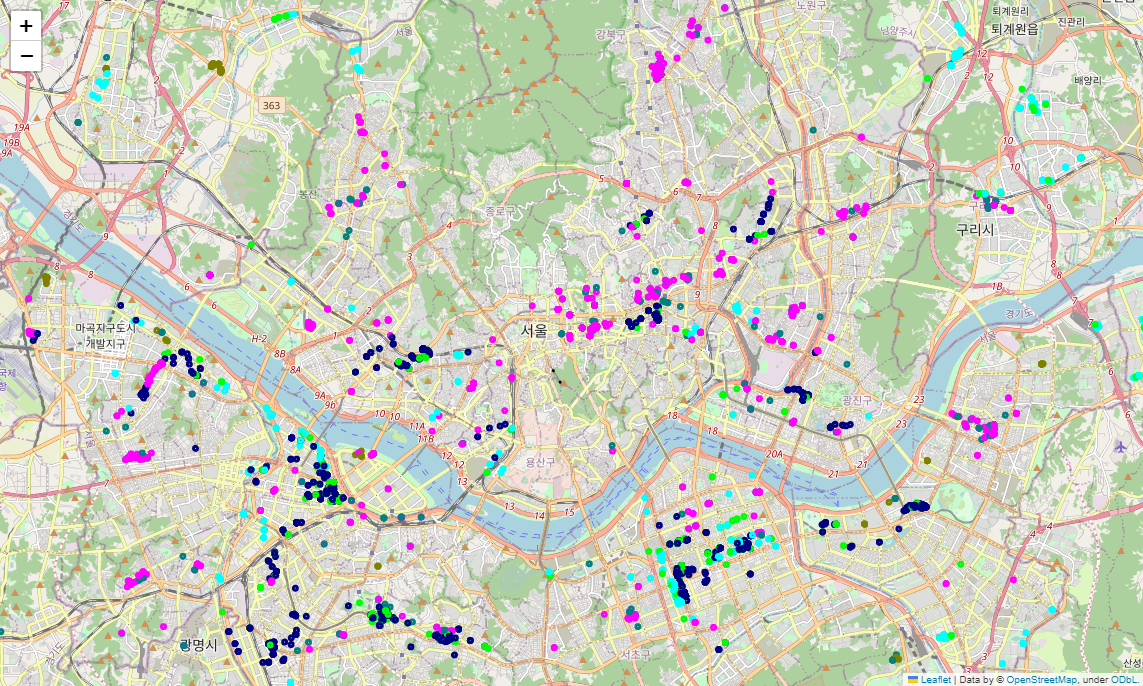

In [55]:
combined_map.save("./folium_results/combined_folium.html")
villa_map.save("./folium_results/villa_folium.html") 
oneroom_map.save("./folium_results/oneroom_folium.html") 
officetel_map.save("./folium_results/officetel_folium.html")